<a href="https://colab.research.google.com/github/Samar2411/Python_Paper_Airplanes/blob/main/Week_9_Machine1_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 9 Lab: Linear Regression using Scikit-Learn**
## **Goal**
The goal of this lab is to get familiar with implementing machine learning algorithms in Python.

## **Tools**
We will use functions from the machine learning toolkit [scikit-learn](https://scikit-learn.org/stable/index.html).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

## **Implementation of Linear Regression**
### **Load Data Set**
Scikit-learn functions require that their inputs be of type ndarray. Either load data directly as an ndarray or load it as a dataframe then convert it to an ndarray. In this example, we will do the former. 

In [ ]:
# Load data as a DataFrame
df = pd.DataFrame({'Area':[400, 800, 1000, 700, 1500, 2000, 1800, 750, 900], 
                   'Bedrooms':[1,2,3,2,4,6,5,2,2],
                   'Price':[550, 1000, 1400, 875, 1875, 2200, 2250, 950, 1125]})
# Convert the pandas DataFrame to numpy ndarrays, separating the input variables from the target variables
X_train = df[['Area', 'Bedrooms']].to_numpy()
y_train = df['Price'].to_numpy()
X_features=['Area', 'Bedrooms']
print("df \n", df, "\n\n X_train \n", X_train, "\n\n y_train \n", y_train)

df 
    Area  Bedrooms  Price
0   400         1    550
1   800         2   1000
2  1000         3   1400
3   700         2    875
4  1500         4   1875
5  2000         6   2200
6  1800         5   2250
7   750         2    950
8   900         2   1125 

 X_train 
 [[ 400    1]
 [ 800    2]
 [1000    3]
 [ 700    2]
 [1500    4]
 [2000    6]
 [1800    5]
 [ 750    2]
 [ 900    2]] 

 y_train 
 [ 550 1000 1400  875 1875 2200 2250  950 1125]


### **Visualize Data**

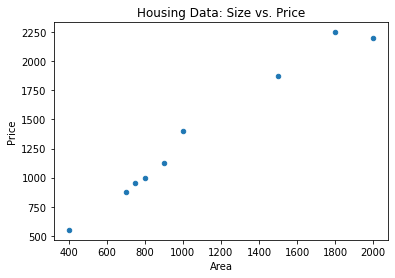

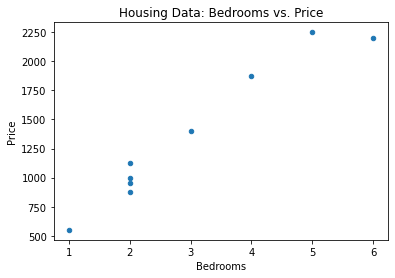

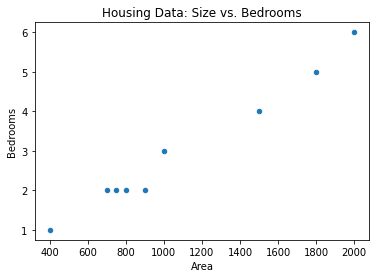

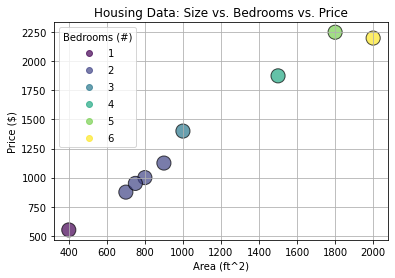

In [ ]:
# 2D scatterplot of size vs. price
df.plot.scatter(x='Area', y='Price', title='Housing Data: Size vs. Price')

# 2D scatterplot of bedrooms vs. price
df.plot.scatter(x='Bedrooms', y='Price', title='Housing Data: Bedrooms vs. Price')

# 2D scatterplot of size vs. bedrooms
df.plot.scatter(x='Area', y='Bedrooms', title='Housing Data: Size vs. Bedrooms')

# 3D scatterplot of size vs. bedrooms vs. price
fig, ax = plt.subplots()
scatter = ax.scatter(x=df['Area'], y=df['Price'], linewidths=1, alpha=0.7, edgecolor='k', s=200, c=df['Bedrooms'])
ax.legend(*scatter.legend_elements(), title='Bedrooms (#)')
ax.set_xlabel('Area (ft^2)')
ax.set_ylabel('Price ($)')
ax.set_title('Housing Data: Size vs. Bedrooms vs. Price')
ax.grid(True)
plt.show()

### **Feature Scaling**
Take a look at the spread of values of our variables. Peak to peak range measures the spread of data and is calculated using the formula: 

*peak to peak range = maximum - minimum*

Notice that the variable Area has a range of [400,2000] and Bedrooms has a range of [1,6]. Thus, Area has a peak to peak range of 1600 and Bedrooms has a peak to peak range of 5.

While these two variables look like they have a linear relationship, each increase of 1 bedroom is equivalent to an increase of ~320 ft^2. This means that their relationship has a very shallow slope and gradient descent make take a long time to converge. In order to speed up gradient descent's convergence, we now normalize the training data.

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw version of data:           X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized version of data:    X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw version of data:           X:[1600    5]
Peak to Peak range by column in Normalized version of data:    X:[3.12 3.2 ]


### **Create Regression Model and Fit It to the Training Data**
To use the linear regression machine learning algorithm, we will use the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) function from scikit-learn. Notice that this function takes in parameters for the cost function and learning rate.

In [ ]:
sgdr = SGDRegressor(loss='squared_error', alpha=0.01, max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.01)
number of iterations completed: 1000, number of weight updates: 9001.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [328.21 239.12], b:[1358.25]


In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 608.41 1017.07 1297.87  953.14]
Target values 
[ 550 1000 1400  875]


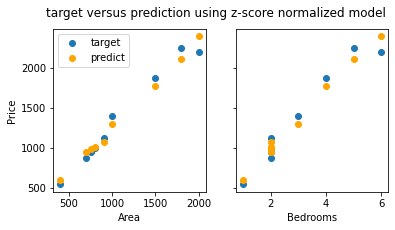

In [ ]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(6,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()